# Quiz 1 (part 2) - Computational Physics I
Name: Males-Araujo Yorlan

Date: Monday, March 25th of 2024

## 1. Plotting and and Python Functions: Log-normal distributions
Log-normal distributions are important in physics. For instance, they characterise the density fields, $\rho$, of supersonically-turbulent flows. A log-normal distribution can be defined by two variables, $\bar\mu$ and $\sigma$, which represent the mean and standard deviation, respectively, of the underlying normal distribution.

### (a) Write down the probability density function (PDF) of a log-normal density distribution in terms of $\bar\mu$, $\sigma$, and the log-normally distributed variable $\rho$. Create a python function that outputs the PDF from user-defined $\bar\mu$, $\sigma$, and $\rho$.

The PDF has the expression
$$ f(\rho|\bar\mu, \rm\ \sigma)=\frac{1}{\sqrt{2\pi}}\frac{1}{\sigma\rho}\exp\left(-\frac{(\ln \rho-\bar\mu)^2}{2\sigma^2}\right), $$

where $\rho$ is the log-normally distributed variable.

In [3]:
# We start by importing the libraries we'll need.
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Then, we define the function.
def pdf_log_norm(mu, sigma, rho):
    """
    Outputs the PDF (the value or array of values)
    of a log-normal density distribution.
    Inputs:  mu -> mean
             sigma -> standard deviation
             rho -> log-normally distributed variable
    Outputs: The corresponding value or values of the PDF.
    Author: M.A.Y.
    Date created: 19/03/2024
    """
    
    # This is the constant term that normalizes the distribution.
    cons = 1/(np.sqrt(2*np.pi))

    # And the function.
    ins=((np.log(rho)-mu)**2)/(2*sigma**2)
    pdf=cons*(1/(sigma*rho))*np.exp(-ins)
    
    return pdf

### (b) Create two python variables for $\bar\mu$ and $\sigma$, and assign adequate values to them. Then, define a 1D vector for the log-normally distributed variable $\rho$. **Hint:** Make sure that the values you choose for these three inputs allow you to see both tails of the log-normal distribution.

In [5]:
# We simply set adequate values for mu and sigma.
mu=0.1
sigma=1.0

Defining the 1D vector for the log-normally distributed variable $\rho$ requires some more steps. It must satisfy the relation $$\rho=\exp(\mu+\sigma Z),$$ where $Z$ is a *standard normal variable*.

In [6]:
# We generate the standard normal numbers,
np.random.seed(234)
standard_norm=np.random.randn(10000)

# and use it to define the 1D vector.
rho=np.exp(mu+sigma*np.sort(standard_norm))

# Note: np.sort() orders the array of numbers in ascending order,
# which was needed in order for the figure to be consistent. 

### (c) Call your function from (a) using the variables defined in (b), and make a plot of the resulting probability density function of $\rho$.


In [7]:
# We feed the function we defined in (a) as follows.
pdf1=pdf_log_norm(mu, sigma, rho)

# print(pdf1)
# The values seemed as expected.

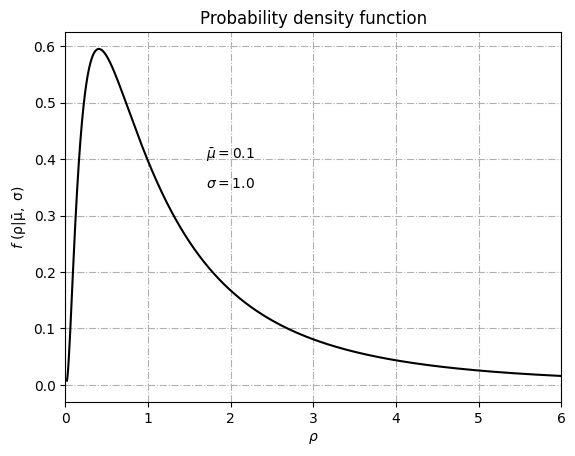

In [10]:
# And we plot the result using a figure environment.
plt.figure()

plt.plot(rho, pdf1, color="k")
plt.grid(linestyle = "-.")
plt.title("Probability density function")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$f \rm\ (\rho|\bar\mu,\rm\ \sigma)$")

plt.xlim(0,6)

plt.text(1.7, 0.4, r'$\bar\mu = {}$'.format(mu), fontsize=10, color="k")
plt.text(1.7, 0.35, r'$\sigma = {}$'.format(sigma), fontsize=10, color="k")

plt.show()
plt.close()

It seems to confirm we did it right.

### (d) Using numpy functions, generate $n=10000$ log-normally distributed random numbers with the same $\bar\mu$ and $\sigma$ as before. Make a histogram of these log-normally distributed numbers.

In [11]:
# The numpy function we can use is .random.lognormal(mu, sigma, n).
# Since mu and sigma have been already defined, 
n=10000

# and we use the function:
np.random.seed(712)
log_num=np.random.lognormal(mu, sigma, n)

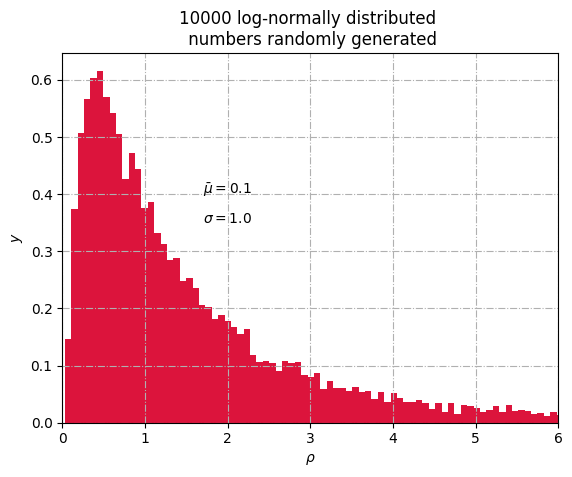

In [19]:
# And we do the histogram by using a figure environment. 
plt.figure()

plt.hist(log_num, bins=500, density=True, color="crimson")
plt.grid(linestyle = "-.")

# Note: density=True adds the normalization.     

plt.title('10000 log-normally distributed \n numbers randomly generated')
plt.xlabel(r"$\rho$")
plt.ylabel(r"$y$")
plt.xlim(0,6)

plt.text(1.7, 0.4, r'$\bar\mu = {}$'.format(mu), fontsize=10, color="k")
plt.text(1.7, 0.35, r'$\sigma = {}$'.format(sigma), fontsize=10, color="k")

plt.show()
plt.close()

At first glance, it does look alike the other plot.

### (e) Make a new figure overplotting the analytical function produced in (c) and the histogram produced in (d). Do these plots coincide? If not, what is missing or can be modified? If needed, modify the code above so that they show better agreement.

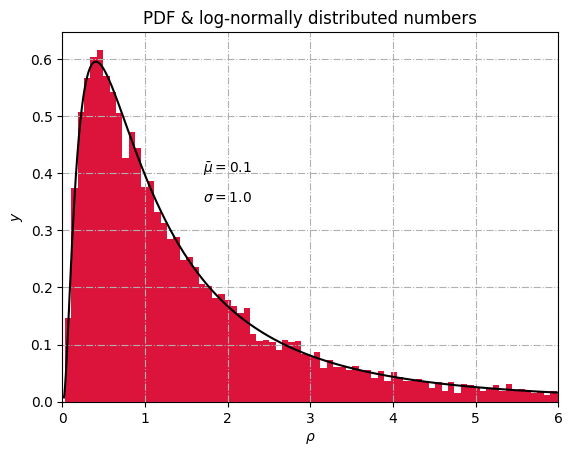

In [18]:
# We simply recycle code and check.
plt.figure()

plt.plot(rho, pdf1, color="k")
plt.hist(log_num, bins=500, density=True, color="crimson")
plt.grid(linestyle = "-.")

plt.title("PDF & log-normally distributed numbers")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$y$")

plt.xlim(0,6)

plt.text(1.7, 0.4, r'$\bar\mu = {}$'.format(mu), fontsize=10, color="k")
plt.text(1.7, 0.35, r'$\sigma = {}$'.format(sigma), fontsize=10, color="k")

plt.show()
plt.close()

The plots do coincide, but one change was made. The argument bins was modified from 10000 (which I thought would be the best) to just 500, and that made them show better agreement. Significantly better.

## 2. Data I/O and Regression: Climate change data

Consider the following data files, which contain climate data:

- **World Monthly Atmospheric Carbon Dioxide Concentrations (in $\rm ppm$)**, which shows the concentration of carbon dioxide in the atmosphere, on a monthly and yearly basis, dating back to 1958. The source data come from the National Oceanic and Atmospheric Association Global Monitoring Laboratory. See file: https://github.com/wbandabarragan/computational-physics-1/blob/main/sample-data/Annual_Surface_Temperature_Change.csv

- **Annual Surface Temperature Change (in $\rm ^{\circ}C$)**, which shows the mean surface temperature change during the period 1961-2021, using temperatures between 1951 and 1980 as a baseline. These data are provided by the Food and Agriculture Organization Corporate Statistical Database (FAOSTAT) and are based on publicly available GISTEMP data from the National Aeronautics and Space Administration Goddard Institute for Space Studies (NASA GISS). See file: https://github.com/wbandabarragan/computational-physics-1/blob/main/sample-data/Atmospheric_CO2_Concentrations.csv

Inspect the data files first, and then carry out the following tasks:

### (a) Create a Python function that uses pandas to read in the **Annual_Surface_Temperature_Change.csv** file, selects the row corresponding to the global anomaly, i.e., the row labeled with "World", and returns two arrays: one containing the years, and the other one containing the yearly temperature anomaly.

In [10]:
# Importing the library.
import pandas as pd

In [11]:
# Inspecting the data.

temp_change=pd.read_csv("Annual_Surface_Temperature_Change.csv", sep=",")

# print(temp_change)

# Seems a bit awful considering what we are asked to do.

In [12]:
# And do the function.

def io_data_temp(filename_1):
    """
    Reads in a .csv file containing information on the annual surface temperature
    change, selects the row corresponding to the global anomaly per year, removes
    the letter "F" from the years and returns two arrays.
    
    Input:   filename_1 -> name of the variable that stores the .csv file
    Outputs: years -> np.array containing the years
             temp_anomaly -> np.array with the yearly temperature change 

    Author: M.A.Y.
    Date: 22/03/2024
    """

    # We read in the csv file.

    csv_file = pd.read_csv(filename_1, sep=",")

    # Select the row we're interested in using .loc and .iloc,
    # but having not yet removed the "F" from the years.

    row = csv_file.loc[csv_file["Country"] == "World"]
    world = row.iloc[:,10:] # (Slicing the first 10 elements away from the row since we aren't interested in them.)
    
    # Now we remove the "F" using a very convenient function. 

    world.columns = world.columns.str.replace("F", "")
    
    # When plotting I realized the years were in string; that's why the change.
    # And the temperature data needed to be reshaped.

    years_str = np.array(world.columns)
    years= np.array([int(i) for i in years_str])
    
    temp_anomaly = np.array(np.reshape(world,(62,)))
    
    return years, temp_anomaly

### (b) Call your function from (a), and make a high-quality, labeled figure of the temperature anomaly (in $\rm ^{\circ}C$) versus time (in $\rm years$). What trend do you see? Carry out a regression using the LM method, and report the resulting regression model with uncertainties. 


#### Plot without regression:

In [13]:
# We call and feed the function.
file_1 = "Annual_Surface_Temperature_Change.csv"
años, temp = io_data_temp(file_1)

# And check.
# print(años, temp)

# They look fine.

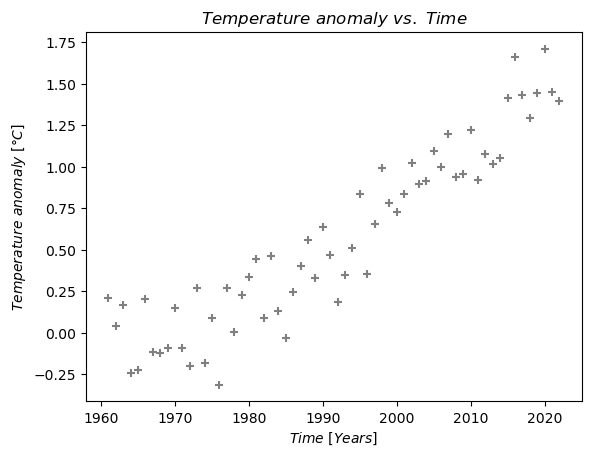

In [14]:
# Plotting.
plt.figure()

plt.scatter(años, temp, marker ="+", color="gray")

plt.title(r"$Temperature\ anomaly\ vs.\ Time$")
plt.ylabel(r"$Temperature\ anomaly\ [°C]$")
plt.xlabel(r"$Time\ [Years]$")

plt.show()
plt.close()

It seems to be linear, but, just from seeing the plot, it could be quadratic too. I guess we'll see it better when doing the regression.

#### Plot with regressions:

In [15]:
# We import the libraries we'll use.
import scipy.stats as st
import scipy.optimize as opt

In [16]:
# We check the two coefficients.

# Spearman:
s = st.spearmanr(años, temp)

# Pearson:
p = st.pearsonr(años, temp)

print("Spearman: ", s)
print("Pearson: ", p)

Spearman:  SignificanceResult(statistic=0.9268833180875995, pvalue=3.228829705681741e-27)
Pearson:  PearsonRResult(statistic=0.9276903585052123, pvalue=2.3416874601946262e-27)


We'll do two regressions: linear and quadratic, and, with the help of the uncertainties and the plot, it will be determined which one is the better one.

In [17]:
# Function for the linear fit.
def linear_model(x, m, b):
    """
    Function to define a linear model to fit data.
    Inputs: x -> data vector
            m -> slope
            b -> intercept with Y-axis
    Output: y -> linear function
    Author: M.A.Y.
    Date: 22/03/24
    """

    y = m * x + b
    
    return y

In [18]:
# And the quadratic fit.
def quadr_model(x, a, b, c):
    """
    Function to define a quadratic model to fit data.
    Inputs: x -> data vector
            a -> coefficient multiplying x**2
            b -> coefficient multiplying x
    Output: c -> intercept with Y-axis
    Author: M.A.Y.
    Date: 22/03/24
    """
    
    y2 = a*x**2 + b*x + c
    
    return y2

In [19]:
# We'll use curve_fit() function as we need to report uncertainties.
coef, cova = opt.curve_fit(linear_model, años, temp)
coef2, cova2 = opt.curve_fit(quadr_model, años, temp)

# Checking the coefficients.
# print(coef, coef2)

In [20]:
# Fittings
linear_fit = linear_model(años, *coef)
quadratic_fit = quadr_model(años, *coef2)

In [21]:
# Reporting the uncertainties of the coefficients (1-sigma).

linear_fit_unc = np.sqrt(np.diag(cova))
quadr_fit_unc = np.sqrt(np.diag(cova2))

print("Parameter estimates with uncertainties:")
print("\n")
print("Linear fit")
print("m =", coef[0], "±", linear_fit_unc[0])
print("b =", coef[1], "±", linear_fit_unc[1])
print("\n")
print("Quadratic fit")
print("a =", coef2[0], "±", quadr_fit_unc[0])
print("b =", coef2[1], "±", quadr_fit_unc[1])
print("c =", coef2[2], "±", quadr_fit_unc[2])

Parameter estimates with uncertainties:


Linear fit
m = 0.027926015927259032 ± 0.0014509319616163275
b = -55.04388652558797 ± 2.8896476520386165


Quadratic fit
a = 0.00030985343641150325 ± 8.207100337473042e-05
b = -1.206220222484438 ± 0.3268914548932199
c = 1173.7580009897429 ± 325.4837771784209


The uncertainties are quite large in the quadratic fit; the linear ones seem fine.

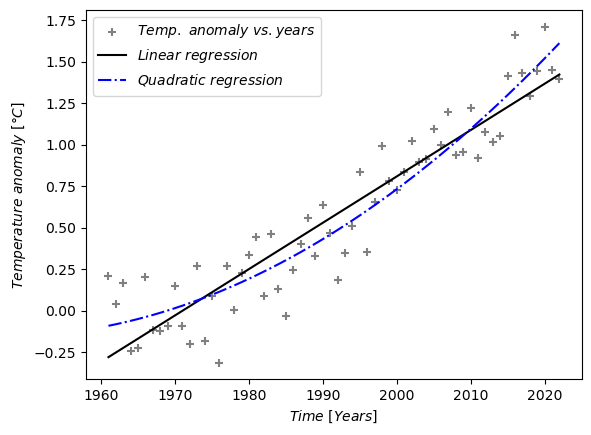

In [22]:
# Plotting everything together.
plt.figure()

plt.scatter(años, temp, marker ="+", color="gray", label=r"$Temp.\ anomaly\ vs. years$")

plt.plot(años, linear_fit, color="k", label=r"$Linear\ regression$")
plt.plot(años, quadratic_fit, linestyle="-.", color="b", label=r"$Quadratic\ regression$")

plt.ylabel(r"$Temperature\ anomaly\ [°C]$")
plt.xlabel(r"$Time\ [Years]$")

plt.legend(loc="best")

plt.show()
plt.close()

I think it's pretty sure to say that the linear fit is the one that adjusts best to the data.

### (c) Create a Python function that uses pandas to read in the **Atmospheric_CO2_Concentrations.csv** file, and returns 3 numpy arrays: one containing the year (see column "Date"), one containing the yearly averages of the Carbon Dioxide Concentrations (computed from column "Value"), and one containing the yearly $1\sigma$ uncertainties associated with the Carbon Dioxide Concentrations (also computed from column "Value").

In [23]:
# Inspecting the data.
data_atmos=pd.read_csv("Atmospheric_CO2_Concentrations.csv")

# print(data_atmos)

# Awful too.

In [24]:
def io_data_co2(filename_2):
    """
    Uses pandas to read in a .csv file with info on
    atmosferic CO2 concentrations and returns 3 arrays.
    Input: filename_2 -> name of variable storing the .csv file
    Outputs: years -> array with the years
             co2_avg -> array with the yearly averages of CO2 concentrations
             co2_unc -> array with the yearly 1-sigma uncertainties
    Author: M.A.Y.
    Date: 23/03/2024
    """
    # Read the csv file and pass it to a pandas DF.
    
    data = pd.read_csv(filename_2)

    # We'll replace the elements in the column "Date" like: "1984MO1" -> 1984.
    # Generating the new column.

    date_wrong = data["Date"]                       # Getting the column,
    date_str =[i[:-3] for i in date_wrong]          # removing the last 3 characters,
    date_repeated = [int(j) for j in date_str]      # and transforming the elements into numbers.

    # Replace it.
    
    data["Date"]=date_repeated    # We have done all this so that it will be easier to group values per year later,
                                  # and get the mean and standard deviation. But there a couple of steps to do yet.
    
    # Now we select only the ppm data as it is the one we are interested in. 
    
    data_2 = data[data["Unit"]=="Parts Per Million"]

    # Removing the outliers: very low CO2 (a couple of histograms made it easier).
    
    data_3 = data_2[data_2["Value"]>10]

    # Then, the yearly averages and the 1-sigma uncertainties vectors are:

    co2_avg = np.array(data_3.groupby("Date")["Value"].mean())    # Yet another very convenient function :)
    co2_unc = np.array(data_3.groupby("Date")["Value"].std())

    # And the year vector without repeated values:

    years = np.unique(np.array(data_3["Date"]))
    
    return years, co2_avg, co2_unc

### (d) Call your function from (c), and make a high-quality, labeled figure of the yearly averages of $\rm CO_2$ Concentrations (in $\rm ppm$) versus time (in $\rm years$). What trend do you see? Carry out a regression using the LM method, and report the resulting regression model with uncertainties. 

#### Plot without regressions:

In [25]:
# Calling the function.

file_2="Atmospheric_CO2_Concentrations.csv"

time, avg, unc = io_data_co2(file_2)

In [26]:
# Checking the shapes. 

print(time.shape, avg.shape, unc.shape)

(66,) (66,) (66,)


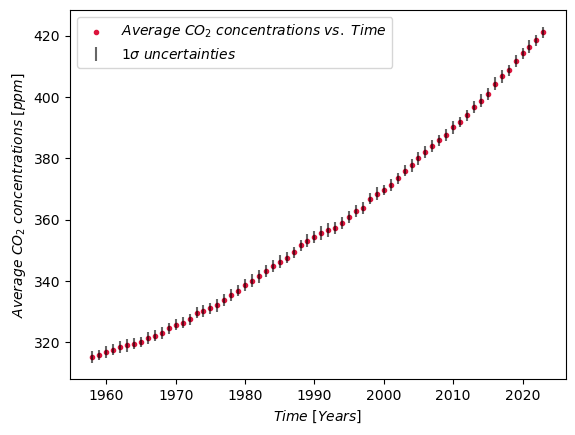

In [27]:
# And plotting.
plt.figure()

plt.scatter(time, avg, marker=".", color = "crimson", label = r"$Average\ CO_2\ concentrations\ vs.\ Time$")
plt.errorbar(time, avg, yerr = unc, color="k", linestyle=" ", alpha=0.6, label=r"$1\sigma\ uncertainties$")

plt.ylabel(r"$Average\ CO_2\ concentrations\ [ppm]$")
plt.xlabel(r"$Time\ [Years]$")

plt.legend()

plt.show()

Seems quadratic. We'll see in the regressions. 

#### Plot with regressions:

In [28]:
# Recycling code:

# We check the two coefficients.

# Spearman:
s2 = st.spearmanr(time, avg)

# Pearson:
p2 = st.pearsonr(time, avg)

print("Spearman: ", s2)
print("Pearson: ", p2)

Spearman:  SignificanceResult(statistic=1.0, pvalue=0.0)
Pearson:  PearsonRResult(statistic=0.990361013151501, pvalue=1.1377722349394086e-56)


Suspiciously high value for the Pearson coefficient. Since I had already defined linear and quadratic models:

In [29]:
# We'll use curve_fit() function as we need to report uncertainties.
coef3, cova3 = opt.curve_fit(linear_model, time, avg)
coef4, cova4 = opt.curve_fit(quadr_model, time, avg)

# Checking the coefficients.
# print(coef3, coef4)

In [30]:
# Fittings
linear_fit2 = linear_model(time, *coef3)
quadratic_fit2 = quadr_model(time, *coef4)

In [31]:
# Reporting the uncertainties of the coefficients (1-sigma).

linear_fit_unc2 = np.sqrt(np.diag(cova3))
quadr_fit_unc2 = np.sqrt(np.diag(cova4))

print("Parameter estimates with uncertainties:")
print("\n")
print("Linear fit")
print("m =", coef3[0], "±", linear_fit_unc2[0])
print("b =", coef3[1], "±", linear_fit_unc2[1])
print("\n")
print("Quadratic fit")
print("a =", coef4[0], "±", quadr_fit_unc2[0])
print("b =", coef4[1], "±", quadr_fit_unc2[1])
print("c =", coef4[2], "±", quadr_fit_unc2[2])

Parameter estimates with uncertainties:


Linear fit
m = 1.6277534878070992 ± 0.028456844060127107
b = -2881.450421018946 ± 56.64594223198509


Quadratic fit
a = 0.013185159786438194 ± 0.00027550756170933354
b = -50.862367630691516 ± 1.0968057064291783
c = 49354.55750793202 ± 1091.525937697327


Unlike before, now the uncertainties are ~small in both cases.

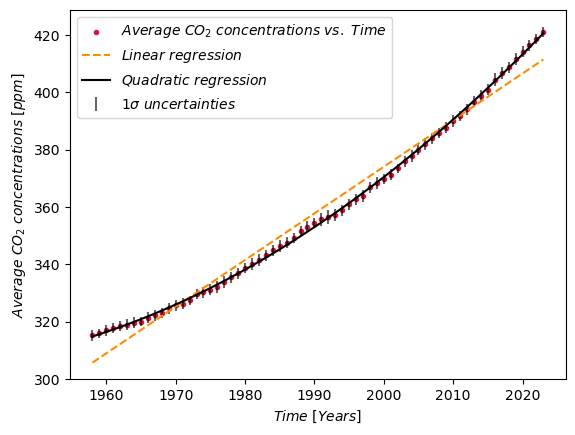

In [32]:
# Plotting everything together.
plt.figure()

plt.scatter(time, avg, marker =".", color="crimson", label = r"$Average\ CO_2\ concentrations\ vs.\ Time$")
plt.errorbar(time, avg, yerr = unc, color="k", linestyle=" ", alpha=0.6, label=r"$1\sigma\ uncertainties$")

plt.plot(time, linear_fit2, color="darkorange", linestyle = "--", label=r"$Linear\ regression$")
plt.plot(time, quadratic_fit2, linestyle="-", color="k", label=r"$Quadratic\ regression$")

plt.ylabel(r"$Average\ CO_2\ concentrations\ [ppm]$")
plt.xlabel(r"$Time\ [Years]$")

plt.legend(loc="best")

plt.show()
plt.close()

Although the Pearson coefficient is strongly suggesting the correlation is linear, it's the quadratic regression line the one that fits the data almost perfectly.

### (e) Create a Python function that uses pandas to output (in CSV format) a new dataframe containing 4 columns:

- Year

- World temperature anomaly

- World $\rm CO_2$ concentration

- $1\sigma$ uncertainty in $\rm CO_2$ concentration


We'll make use of the two functions we have defined and put them inside the one we're asked to do.

In [33]:
# The function.

def io_csv(filename_1, filename_2):
    """
    Makes use of two earlier defined functions which were used to get
    np.arrays from .csv files with info on global temperature change and CO2
    concentrations respectively. Both yearly. Then selects the overlapping years
    and combine the data into a .csv file with 4 columns. 
    Inputs: filename_1, filename_2 -> variables storing the .csv files
    Output: .csv file with 4 columns:
            1) Time [years]
            2) World temperature anomaly [°C]
            3) World CO2 concentrations [ppm]
            4) 1-sigma uncertainty in CO2 concentration [ppm]
    Author: M.A.Y.
    Date: 23/03/2024
    """
    # Reusing the functions and getting the said arrays:
    
    years1, temp_anomaly = io_data_temp(filename_1)
    years2, co2_avg, co2_sigma = io_data_co2(filename_2)

    # We put the second set of data into a pandas DF because it is the one that has to be sliced.

    co2_con = pd.DataFrame({"Time [years]": years2, "World CO2 concentrations [ppm]": co2_avg, "1-sigma uncertainties in CO2 [ppm]":co2_sigma})

    # The first oset covers the years 1961-2022, and the second 1958-2023. So using conditionals:

    min = 1961
    max = 2022

    co2_con_sliced = co2_con[(co2_con["Time [years]"] >= min) & (co2_con["Time [years]"] <= max)]

    # We insert the array containing the temperature change in °C in the second column position.

    co2_con_sliced.insert(1, "World temperature change [°C]", temp_anomaly)

    # And finally we transform it into a .csv file.
    
    co2_con_sliced.to_csv("co2_temp.csv", sep="," , index=False, float_format = "{:.4e}".format)

    co2_temp = pd.read_csv("co2_temp.csv")
    
    return co2_temp

### (f) Using the new dataframe from (e), make a high-quality, labeled scatter plot (using markers) of the $\rm CO_2$ concentration (including the $1\sigma$ y-error bars) versus temperature anomaly. How monotonic and/or linear is the relation between the two variables?

In [34]:
# Since file_1 and file_2 were already defined:
four_columns = io_csv(file_1, file_2)

In [35]:
# We check it.

# four_columns.head()

# It seems good :)

In [36]:
# Before plotting, let's put the data into arrays:

temperature = np.array(four_columns["World temperature change [°C]"])
carbon_dioxide = np.array(four_columns["World CO2 concentrations [ppm]"])
sigma_errors = np.array(four_columns["1-sigma uncertainties in CO2 [ppm]"])

# Checking one of them:
# print(temperature)

In [37]:
# Now we sort the data because it showed to be disordered.
indexes = np.argsort(temperature)

# Saving the new ordered variables :).
sorted_x = temperature[indexes]
sorted_y = carbon_dioxide[indexes]
sorted_errors = sigma_errors[indexes]

(Note after having worked with the disordered and ordered data: The results didn't change. Some of the uncertainties of the coefficients may have changed but by very little. I don't see, practically, why we should work with one or another.)

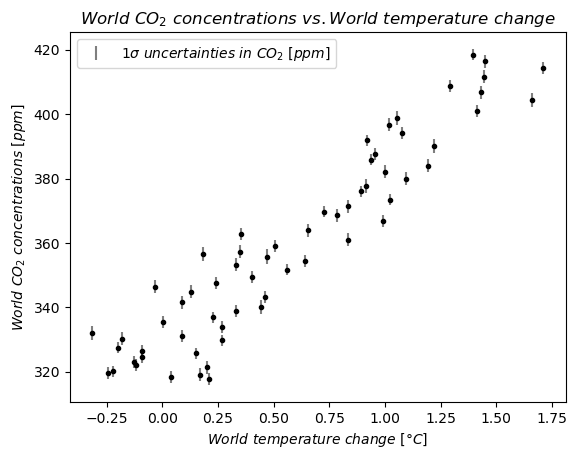

In [38]:
# And the corresponding plot.
plt.figure()

plt.plot(sorted_x, sorted_y, linestyle = " ", marker = ".", color="k")

plt.errorbar(sorted_x, sorted_y, yerr=sorted_errors, color="k", linestyle=" ", alpha=0.5,\
           label=r"$1\sigma\ uncertainties\ in\ CO_{2}\ [ppm]$")

plt.title(r"$World\ CO_{2}\ concentrations\ vs. World\ temperature\ change$")
plt.xlabel(r"$World\ temperature\ change\ [°C]$")
plt.ylabel(r"$World\ CO_{2}\ concentrations\ [ppm]$")

plt.legend(loc="best")

plt.show()
plt.close()

To safely say about monotonicity and linearity, we'll need to compute the corresponding coefficients.

In [39]:
# Let's check them.

# Spearman:
s3 = st.spearmanr(sorted_x, sorted_y)

# Pearson:
p3 = st.pearsonr(sorted_x, sorted_y)

print("Spearman: ", s3)
print("Pearson: ", p3)

Spearman:  SignificanceResult(statistic=0.9268833180875996, pvalue=3.2288297056816028e-27)
Pearson:  PearsonRResult(statistic=0.9424134264720715, pvalue=3.132007866388405e-30)


At first glance and, confirmed by the coefficients, the relation between the variables does appear to be monotonic and linear. However, that's all we can say: that it appears to be. 

### (g) Carry out two regressions using the $\chi^2$ method for two different regression models (which you can propose yourself), and report the resulting regression functions with uncertainties.

Since the relation seems to be linear, one of the proposed model will be a linear one. The other one will be of exponential form given the current state of climate change. 

In [40]:
# Defining the models to be used:

def fit_model_1(x, a, b, c):
    """
    Exponential model to fit the data.
    Inputs: x -> 1D array
            a, b, c -> parameters
    Output: The exponential fit. 
    Author: M.A.Y.
    Date: 25/03/2024
    """
    y_1 = a*np.exp(b*x)+c
    return y_1

def fit_model_2(x, f, g):
    """
    Linear model to fit the data.
    Inputs: x -> 1D array.
            f, g -> parameters
    Output: The linear fit.
    Author: M.A.Y.
    Date: 25/03/2024
    """
    y_2 = f*x+g
    return y_2

Here we fit the two models.

In [46]:
# We use .curve_fit() because we need the uncertainties:

coef_chi_1, cova_chi_1 = opt.curve_fit(fit_model_1, sorted_x, sorted_y, sigma = sorted_errors)
coef_chi_2, cova_chi_2 = opt.curve_fit(fit_model_2, sorted_x, sorted_y, sigma = sorted_errors)

# we get them:

unc_chi_1 = np.sqrt(np.diag(cova_chi_1))
unc_chi_2 = np.sqrt(np.diag(cova_chi_2))

# and we report them as follows (recycling code). 

print("Parameter estimates with uncertainties:")
print("\n")
print("Exponential fit: y_1(x) = a*e^(b*x) + c")
print("a =", coef_chi_1[0], "±", unc_chi_1[0])
print("b =", coef_chi_1[1], "±", unc_chi_1[1])
print("c =", coef_chi_1[2], "±", unc_chi_1[2])
print("\n")
print("Linear fit: y_2(x) = f*x + g")
print("f =", coef_chi_2[0], "±", unc_chi_2[0])
print("g =", coef_chi_2[1], "±", unc_chi_2[1])

Parameter estimates with uncertainties:


Exponential fit: y_1(x) = a*e^(b*x) + c
a = 187.75855726014265 ± 154.54434819248974
b = 0.24099238030118922 ± 0.1697080418098651
c = 142.20678323893827 ± 155.22200876006454


Linear fit: y_2(x) = f*x + g
f = 52.94033689144905 ± 2.377933185305115
g = 329.2766152912715 ± 1.8510284620459732


To some degree, the large uncertainties in the exponential fit and the small ones in the linear fit were both expected.

### (h) Make a plot comparing the two above fits to the data. Which regression model produces the best result according to your goodness-of-fit analysis?

#### Plot:

In [42]:
# We use the model and the coefficients from opt.curve_fit():
y_chi_1 = fit_model_1(sorted_x, *coef_chi_1)
y_chi_2 = fit_model_2(sorted_x, *coef_chi_2)

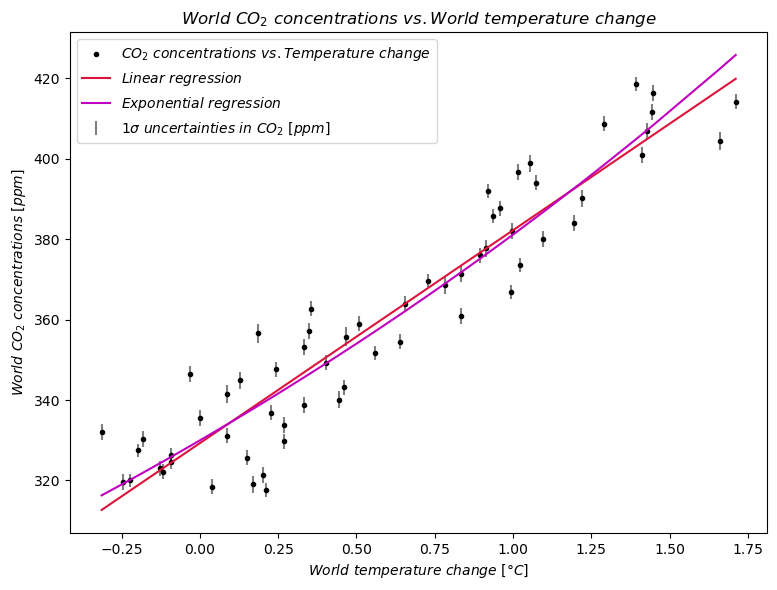

In [43]:
# And we use them to make the plot.
plt.figure(figsize=(9,6.5))

plt.scatter(sorted_x, sorted_y, marker=".", color="k",\
            label = r"$CO_{2}\ concentrations\ vs. Temperature\ change$" )

plt.errorbar(sorted_x, sorted_y, yerr=sorted_errors, color="k", linestyle=" ", alpha=0.5,\
            label=r"$1\sigma\ uncertainties\ in\ CO_{2}\ [ppm]$")

plt.plot(sorted_x, y_chi_2, color = "crimson", label = r"$Linear\ regression$")
plt.plot(sorted_x, y_chi_1, color = "m",  linestyle ="-",label=r"$Exponential\ regression$")

plt.title(r"$World\ CO_{2}\ concentrations\ vs. World\ temperature\ change$")
plt.xlabel(r"$World\ temperature\ change\ [°C]$")
plt.ylabel(r"$World\ CO_{2}\ concentrations\ [ppm]$")

plt.legend(loc="best")

plt.show()
plt.close()

#### Goodness-of-fit analysis:

In [44]:
# We first define a function for the chi^2 stat.

def chi_sqr_stat(f, fit, sigma):
    """
    This is a function that return the chi^2 stat.
    The value returned should be used in optimisation
    Input: beta -> free param.
    Output: chi_sqr value
    """
    
    # Chi^2 expression
    chi_stat = np.sum((f - fit)**2/(sigma)**2)
    
    return chi_stat

In [45]:
# And now we compute the chi^2 stat for the two models.

chi_sqr_1 = chi_sqr_stat(sorted_y, y_chi_1, sorted_errors)
chi_sqr_2 = chi_sqr_stat(sorted_y, y_chi_2, sorted_errors)

# Let us get the nu's,
nu_1 = len(sorted_y) - len(coef_chi_1)
nu_2 = len(sorted_y) - len(coef_chi_2)

# and the respective reduced chi^2 values.
red_chi_1 = chi_sqr_1/nu_1
red_chi_2 = chi_sqr_2/nu_2

# We report them as follows:

print("Reduced chi^2 for the exponential chi^2 fit: ", red_chi_1)
print("Reduced chi^2 for the linear chi^2 fit: ", red_chi_2)

Reduced chi^2 for the exponential chi^2 fit:  27.229719332114172
Reduced chi^2 for the linear chi^2 fit:  27.836044892621498


According to the analysis and results, we can say that the exponential regression model would be, by very very little, the better of the two. However, I think it would be safer to say they have the same level of accuracy since the reduced chi^2 values don't vary by that much. It's also worth mentioning that the values are a bit high.